<a href="https://colab.research.google.com/github/PrachiHarish/NLP-Projects/blob/main/Copy_of_Sentiment_analysis_tweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential,Model
from keras.layers import*
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
import string
import matplotlib.pyplot as plt

In [ ]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
import nltk
nltk.download('words')
import nltk
nltk.download('wordnet')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
pip; install;"pad-sequences>=0.6.0"


Usage:   
  pip3 <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  inspect                     Inspect the python environment.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper c

In [ ]:
from tensorflow.keras.utils import pad_sequences

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/Sentiment.csv')
dataset.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [ ]:
dataset = dataset[['text','sentiment']]
print(dataset)

                                                    text sentiment
0      RT @NancyLeeGrahn: How did everyone feel about...   Neutral
1      RT @ScottWalker: Didn't catch the full #GOPdeb...  Positive
2      RT @TJMShow: No mention of Tamir Rice and the ...   Neutral
3      RT @RobGeorge: That Carly Fiorina is trending ...  Positive
4      RT @DanScavino: #GOPDebate w/ @realDonaldTrump...  Positive
...                                                  ...       ...
13866  RT @cappy_yarbrough: Love to see men who will ...  Negative
13867  RT @georgehenryw: Who thought Huckabee exceede...  Positive
13868  RT @Lrihendry: #TedCruz As President, I will a...  Positive
13869  RT @JRehling: #GOPDebate Donald Trump says tha...  Negative
13870  RT @Lrihendry: #TedCruz headed into the Presid...  Positive

[13871 rows x 2 columns]


In [ ]:
sentiment_counts = dataset.groupby(['sentiment']).size()
print(sentiment_counts)

sentiment
Negative    8493
Neutral     3142
Positive    2236
dtype: int64


In [ ]:
dataset = dataset[dataset.sentiment != "Neutral"]
print(dataset.shape)

(10729, 2)


In [ ]:
df_minority=dataset[dataset["sentiment"]=="Positive"]
print(df_minority.shape)
df_minority2=dataset[dataset["sentiment"]=="Negative"]
print(df_minority2.shape)

(2236, 2)
(8493, 2)


In [ ]:
df_class_oversample = df_minority.sample(50000,replace=True)
df_class_oversample2 = df_minority2.sample(50000,replace=True)

In [ ]:
df_merged = pd.concat([df_class_oversample2,df_class_oversample], ignore_index=True, sort=False)
print(df_merged)
df_merged.shape

                                                    text sentiment
0      A Foxy, Rowdy Republican Debate #GOPDebate Que...  Negative
1      RT @RWSurferGirl: Is it just me or does anyone...  Negative
2      Overall the main thing we learned from the #GO...  Negative
3      RT @jennifernvictor: .@RandPaul "We're borrowi...  Negative
4      RT @Trainspotter001: Insightful commentary fro...  Negative
...                                                  ...       ...
99995  #GOPDebate: Ted Cruz’s Precious Daughters Stea...  Positive
99996  Carly Fiorina is really impressive, I hope she...  Positive
99997  RT @COHealthAccess: The biggest winner at the ...  Positive
99998  RT @UnitedCitizen01: #FOXNEWS  #GOPDebates  @B...  Positive
99999  Frank Luntz #GOPdebate\nTed Cruz. Great news!\...  Positive

[100000 rows x 2 columns]


(100000, 2)

In [ ]:
shuffled = df_merged.sample(frac=1)
print(shuffled)
shuffled.shape

                                                    text sentiment
57997  I like what Marco Rubio had to say at the begi...  Positive
10177  RT @cowboytexas: Proof #GOPDebate Republicans ...  Negative
2976   RT @LoganJames: Kill people and break things #...  Negative
30622  Does @realDonaldTrump believe he's gonna win r...  Negative
86543  RT @AmnaKhalid: “If I have to monitor a mosque...  Positive
...                                                  ...       ...
61978         Rubio is American Dream story. #GOPDebates  Positive
41050  RT @cerenomri: I thought we fought the Revolut...  Negative
98574  RT @Wilberforce91: One of my favorite things a...  Positive
3436   RT @RWSurferGirl: Is it just me or does anyone...  Negative
96730  RT @T0H0DAD: By far the most professional cand...  Positive

[100000 rows x 2 columns]


(100000, 2)

In [ ]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
shuffled['punch_free']= shuffled['text'].apply(lambda x:remove_punctuation(x))
shuffled['punch_free1'] = shuffled['punch_free'].apply((lambda x: re.sub('[^a-zA-z\s]','',x)))
shuffled['punch_free2'] = shuffled['punch_free1'].apply((lambda x: re.sub('RT','',x)))
print(shuffled["punch_free2"])

57997    I like what Marco Rubio had to say at the begi...
10177     cowboytexas Proof GOPDebate Republicans and F...
2976      LoganJames Kill people and break things GOPDe...
30622    Does realDonaldTrump believe hes gonna win rep...
86543     AmnaKhalid If I have to monitor a mosque Ill ...
                               ...                        
61978             Rubio is American Dream story GOPDebates
41050     cerenomri I thought we fought the Revolution ...
98574     Wilberforce One of my favorite things about t...
3436      RWSurferGirl Is it just me or does anyone els...
96730     THDAD By far the most professional candidate ...
Name: punch_free2, Length: 100000, dtype: object


In [ ]:
shuffled['msg_lower']= shuffled['punch_free2'].apply(lambda x: x.lower())
print(shuffled["msg_lower"])

57997    i like what marco rubio had to say at the begi...
10177     cowboytexas proof gopdebate republicans and f...
2976      loganjames kill people and break things gopde...
30622    does realdonaldtrump believe hes gonna win rep...
86543     amnakhalid if i have to monitor a mosque ill ...
                               ...                        
61978             rubio is american dream story gopdebates
41050     cerenomri i thought we fought the revolution ...
98574     wilberforce one of my favorite things about t...
3436      rwsurfergirl is it just me or does anyone els...
96730     thdad by far the most professional candidate ...
Name: msg_lower, Length: 100000, dtype: object


In [ ]:
def tokenization(text):
    tokens=nltk.wordpunct_tokenize(text)
    return tokens
shuffled['msg_tokenied']= shuffled['msg_lower'].apply(lambda x: tokenization(x))
print(shuffled["msg_tokenied"])

57997    [i, like, what, marco, rubio, had, to, say, at...
10177    [cowboytexas, proof, gopdebate, republicans, a...
2976     [loganjames, kill, people, and, break, things,...
30622    [does, realdonaldtrump, believe, hes, gonna, w...
86543    [amnakhalid, if, i, have, to, monitor, a, mosq...
                               ...                        
61978      [rubio, is, american, dream, story, gopdebates]
41050    [cerenomri, i, thought, we, fought, the, revol...
98574    [wilberforce, one, of, my, favorite, things, a...
3436     [rwsurfergirl, is, it, just, me, or, does, any...
96730    [thdad, by, far, the, most, professional, cand...
Name: msg_tokenied, Length: 100000, dtype: object


In [ ]:
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
shuffled['msg_stopword']= shuffled['msg_tokenied'].apply(lambda x:remove_stopwords(x))
print(shuffled["msg_stopword"])

57997    [like, marco, rubio, say, beginning, actually,...
10177    [cowboytexas, proof, gopdebate, republicans, f...
2976     [loganjames, kill, people, break, things, gopd...
30622    [realdonaldtrump, believe, hes, gonna, win, re...
86543    [amnakhalid, monitor, mosque, ill, monitor, mo...
                               ...                        
61978          [rubio, american, dream, story, gopdebates]
41050    [cerenomri, thought, fought, revolution, quart...
98574    [wilberforce, one, favorite, things, gopdebate...
3436     [rwsurfergirl, anyone, else, want, punch, chri...
96730    [thdad, far, professional, candidate, tedcruz,...
Name: msg_stopword, Length: 100000, dtype: object


In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text
shuffled['msg_lemmatized']=shuffled['msg_stopword'].apply(lambda x:lemmatizer(x))
print(shuffled["msg_lemmatized"])

57997    [like, marco, rubio, say, beginning, actually,...
10177    [cowboytexas, proof, gopdebate, republican, fo...
2976     [loganjames, kill, people, break, thing, gopde...
30622    [realdonaldtrump, believe, he, gonna, win, rep...
86543    [amnakhalid, monitor, mosque, ill, monitor, mo...
                               ...                        
61978          [rubio, american, dream, story, gopdebates]
41050    [cerenomri, thought, fought, revolution, quart...
98574    [wilberforce, one, favorite, thing, gopdebates...
3436     [rwsurfergirl, anyone, else, want, punch, chri...
96730    [thdad, far, professional, candidate, tedcruz,...
Name: msg_lemmatized, Length: 100000, dtype: object


In [ ]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(shuffled['msg_stopword'].values)
X = tokenizer.texts_to_sequences(shuffled['msg_stopword'].values)
print(X)
X = pad_sequences(X)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(X)
print(x.shape)
print(x)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(100000, 22)
[[-0.0164339  -0.0164339  -0.0164339  ...  2.22302746 -0.30805633
  -0.5411672 ]
 [-0.0164339  -0.0164339  -0.0164339  ...  1.33111332  0.59381022
   0.22284448]
 [-0.0164339  -0.0164339  -0.0164339  ... -0.25671408 -0.3830383
  -0.5411672 ]
 ...
 [-0.0164339  -0.0164339  -0.0164339  ... -0.66192939  0.1272557
  -0.5266146 ]
 [-0.0164339  -0.0164339  -0.0164339  ... -0.6355023  -0.7204572
  -0.53874177]
 [-0.0164339  -0.0164339  -0.0164339  ... -0.61127747 -0.67671771
  -0.53874177]]


In [ ]:
y=shuffled["sentiment"]
print(y.shape)

(100000,)


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
Y=y.values.reshape(-1, 1)
print(Y)
y_onehot = encoder.fit_transform(Y)
y_onehot_arr = y_onehot.toarray()
print(y_onehot_arr)

[['Positive']
 ['Negative']
 ['Negative']
 ...
 ['Positive']
 ['Negative']
 ['Positive']]
[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [ ]:
model_ann1=Sequential()
model_ann1.add(Dense(16,input_dim=x.shape[1],activation="tanh",kernel_initializer="he_uniform"))
model_ann1.add(Dense(32,activation="tanh",kernel_initializer="he_uniform"))
model_ann1.add(Dense(48,activation="tanh",kernel_initializer="he_uniform"))
model_ann1.add(Dense(64,activation="tanh",kernel_initializer="he_uniform"))
model_ann1.add(Dense(80,activation="tanh",kernel_initializer="he_uniform"))
model_ann1.add(Dense(96,activation="tanh",kernel_initializer="he_uniform"))
model_ann1.add(Dense(128,activation="tanh",kernel_initializer="he_uniform"))
model_ann1.add(Dense(256,activation="tanh",kernel_initializer="he_uniform"))
model_ann1.add(Dense(512,activation="tanh",kernel_initializer="he_uniform"))
model_ann1.add(Dense(640,activation="tanh",kernel_initializer="he_uniform"))
model_ann1.add(Dense(2,activation="softmax",kernel_initializer="he_uniform"))
model_ann1.compile(optimizer="SGD",loss="binary_crossentropy",metrics=["accuracy"])
model_ann1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 16)                368       
                                                                 
 dense_31 (Dense)            (None, 32)                544       
                                                                 
 dense_32 (Dense)            (None, 48)                1584      
                                                                 
 dense_33 (Dense)            (None, 64)                3136      
                                                                 
 dense_34 (Dense)            (None, 80)                5200      
                                                                 
 dense_35 (Dense)            (None, 96)                7776      
                                                                 
 dense_36 (Dense)            (None, 128)              

In [ ]:
inp=Input(shape=(22,))
x=Flatten()(inp)
x=Dense(16,activation="relu")(x)
x=Dense(32,activation="relu")(x)
x=Dense(48,activation="tanh",kernel_initializer="he_uniform")(x)
x=Dense(64,activation="tanh",kernel_initializer="he_uniform")(x)
x=Dense(80,activation="tanh",kernel_initializer="he_uniform")(x)
x=Dense(96,activation="tanh",kernel_initializer="he_uniform")(x)
x=Dense(128,activation="tanh",kernel_initializer="he_uniform")(x)
x=Dense(256,activation="tanh",kernel_initializer="he_uniform")(x)
x=Dense(512,activation="tanh",kernel_initializer="he_uniform")(x)
x=Dense(640,activation="tanh",kernel_initializer="he_uniform")(x)
out=Dense(2,activation="softmax",kernel_initializer="he_uniform")(x)
model_ann2=Model(inp,out)
model_ann2.compile(optimizer="SGD",loss="binary_crossentropy",metrics=["accuracy"])
model_ann2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 22)]              0         
                                                                 
 flatten_2 (Flatten)         (None, 22)                0         
                                                                 
 dense_31 (Dense)            (None, 16)                368       
                                                                 
 dense_32 (Dense)            (None, 32)                544       
                                                                 
 dense_33 (Dense)            (None, 48)                1584      
                                                                 
 dense_34 (Dense)            (None, 64)                3136      
                                                                 
 dense_35 (Dense)            (None, 80)                5200

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y_onehot_arr,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 22)
(20000, 22)
(80000, 2)
(20000, 2)


In [ ]:
history_ann=model_ann1.fit(x_train,y_train,epochs=50,batch_size=128,validation_data=(x_test,y_test),verbose=1)

Epoch 1/50
625/625 [==============================] - 5s 5ms/step - loss: 0.6570 - accuracy: 0.6026 - val_loss: 0.6250 - val_accuracy: 0.6323
Epoch 2/50
625/625 [==============================] - 4s 6ms/step - loss: 0.6062 - accuracy: 0.6516 - val_loss: 0.5900 - val_accuracy: 0.6651
Epoch 3/50
625/625 [==============================] - 3s 5ms/step - loss: 0.5792 - accuracy: 0.6689 - val_loss: 0.5688 - val_accuracy: 0.6838
Epoch 4/50
625/625 [==============================] - 3s 5ms/step - loss: 0.5605 - accuracy: 0.6855 - val_loss: 0.5555 - val_accuracy: 0.6873
Epoch 5/50
625/625 [==============================] - 3s 5ms/step - loss: 0.5453 - accuracy: 0.6989 - val_loss: 0.5493 - val_accuracy: 0.6947
Epoch 6/50
625/625 [==============================] - 4s 6ms/step - loss: 0.5318 - accuracy: 0.7113 - val_loss: 0.5286 - val_accuracy: 0.7071
Epoch 7/50
625/625 [==============================] - 3s 5ms/step - loss: 0.5178 - accuracy: 0.7242 - val_loss: 0.5112 - val_accuracy: 0.7262
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


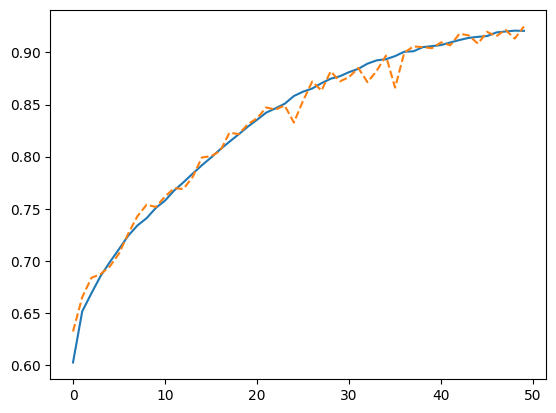

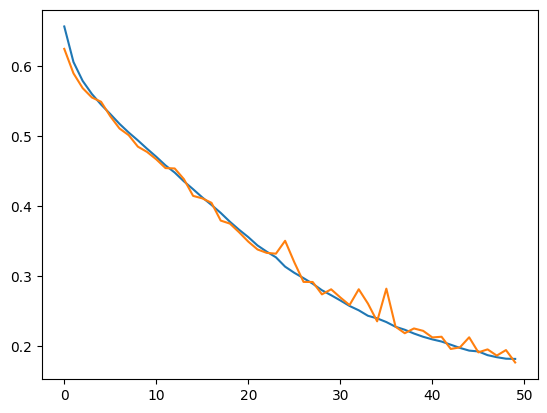

In [ ]:
print(history_ann.history.keys())

f,ax=plt.subplots()
ax.plot(history_ann.history["accuracy"])
ax.plot(history_ann.history["val_accuracy"],"--")

f,ax=plt.subplots()
ax.plot(history_ann.history["loss"])
ax.plot(history_ann.history["val_loss"])

In [ ]:
score=model_ann1.evaluate(x_test,y_test,verbose=0)
print("loss:",score[0])
print("acc:",score[1])

loss: 0.1766168475151062
acc: 0.9248499870300293


In [ ]:
y_pred=model_ann1.predict(x_test)
y_pred=np.where(y_pred>0.5,1,0)
print(y_test)
print(y_pred)
y_pred_class=np.argmax(y_pred,axis=1)
y_test_class=np.argmax(y_test,axis=1)
print(y_pred_class)
print(y_pred_class.shape)
print(y_test_class)
print(y_test_class.shape)

625/625 [==============================] - 1s 2ms/step
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]
[[0 1]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [1 0]]
[1 0 0 ... 1 1 0]
(20000,)
[1 0 1 ... 1 1 0]
(20000,)


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cr=classification_report(y_test_class,y_pred_class)
print(cr)
cm=confusion_matrix(y_test_class,y_pred_class)
print(cm)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      9978
           1       0.90      0.95      0.93     10022

    accuracy                           0.92     20000
   macro avg       0.93      0.92      0.92     20000
weighted avg       0.93      0.92      0.92     20000

[[8954 1024]
 [ 479 9543]]
